# RAMP Challenge on Selectivity classification of higher education programs in France



# RAMP: Selectivity classification Challenge
*Hela Mhiri, Haythem Borchani , Mahdi Attia, Sami ElMokh from IPP/M2DS*

<div>
<table style="width:100%; background-color:white;">
  <tr style="background-color:white;">
    <td align="left"; style="background-color:white; width: 100%;">
        <a href="https://www.ip-paris.fr/">
            <img src="https://www.ip-paris.fr/voeux2022-telecomparis/images/logos_ecoles.png" width="1000px"/>
        </a>
    </td>
  </tr>
 </table>
</div>


## Table of Contents
* [Introduction](#introduction)
  * [Context](#context)
  * [Challenge Objective](#challenge-objective)
* [The dataset](#dataset)
* [Requirements](#Requirements)

* [Data exploration](#exploration)
  * [Data download](#download)
  * [Visualize data](#visualize)
* [Base Model](#Base)
* [Submitting on RAMP](#submitting)

## Introduction <a class="anchor" id="introduction"></a>

In today's rapidly evolving educational landscape, the competitiveness of educational programs plays a crucial role in shaping the academic and professional trajectories of students. Institutions offering programs ranging from undergraduate degrees to specialized courses often face the challenge of selecting candidates from a pool of applicants. Understanding the selectivity of these programs can provide valuable insights into their admission processes and overall reputation.

In this challenge, we aim to develop a machine learning model capable of predicting the selectivity of educational programs based on various factors . By leveraging historical data and advanced predictive modeling techniques, we seek to empower educational stakeholders with a tool that can aid in decision-making processes related to admissions and program management.
### Context <a class="anchor" id="context"></a>

In the quest for higher education, students often find themselves confronted with a myriad of options, each offering unique opportunities and pathways towards their academic and career aspirations. However, navigating through this plethora of choices can be daunting, particularly when it comes to assessing the selectivity and competitiveness of various educational programs.
To aid students in making well-informed decisions, educational institutions and policymakers have recognized the importance of providing transparent and comparative information about program selectivity. By leveraging predictive models developed through machine learning and data analysis, institutions can conduct comparative analyses of different programs to determine their relative levels of selectivity.

### Challenge Objective <a class="anchor" id="challenge-objective"></a>

The objective of this challenge is to develop a predictive model capable of determining the selectivity of educational programs. By leveraging machine learning techniques and analyzing relevant data, participants are tasked with creating a model that can accurately classify whether a particular educational program is non-selective,peu selective,tres selective.

## The dataset <a class="anchor" id="dataset"></a>
The description of all the columns of the dataset is available from the [gov site](https://www.data.gouv.fr/fr/datasets/parcoursup-2023-voeux-de-poursuite-detudes-et-de-reorientation-dans-lenseignement-superieur-et-reponses-des-etablissements/#/resources)

For this challenge, the data were first preprocessed and split in order to preserve a private test set on which to evaluate the models on our servers. This leaves  observations in the public train set and  observations in the public test set. 
Observations are grouped in with respect to the name of formation (fili) and we are very cautious to keep those observations from the same sample either in the train set or in the test set (both during splitting  and cross-validation)..

Preprocessing steps before splitting the data:

1-We have begin our preprocessing by refining the understanding of selectivity among educational formations:
 Initial data classification ('select_form') provides a binary distinction:
 - "formation non sélective": Indicating programs with less competitive admission processes.
- "formation sélective": Denoting programs with more stringent admission criteria.
Given the imbalance in the dataset, with approximately 13,000 "formation sélective" and only 3,000 "formation non sélective",there's a need for a more nuanced categorization to better capture the spectrum of selectivity.

The enhancement involves expanding the binary classification into three distinct categories:

    1. "Non sélective": Programs that are initially selective.
    2. "Peu sélective": Programs with moderate selectivity, indicating a balanced level of competition.
    3. "Très sélective": Highly competitive programs, characterized by low acceptance rates.

 This categorization relies on the 'Taux_acces_ens', a key metric representing the access rate.
 It's calculated as the ratio of the number of applicants whose ranking is lower than or equal to the ranking of the last admitted applicant in their group, to the total number of applicants who expressed a preference for the program during the principal phase of application.
Implementing these three labels allows for a more detailed analysis of selectivity across educational formations, aiming to provide insights that the original binary classification could not capture.

2-Perform data cleaning and split the train,test datasets using stratified spliting

## Requirements <a class="anchor" id="requirements"></a>

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedGroupKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/Users/mahdi/anaconda3/envs/ml-environment/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data exploration <a class="anchor" id="exploration"></a>

### Data download <a class="anchor" id="download"></a>


In [3]:
df = pd.read_csv('./data/train.csv', sep=',')

### Visualize data <a class="anchor" id="visualize"></a>

In [4]:
df.head()

,contrat_etab,fili,capa_fin,voe_tot,voe_tot_f,nb_voe_pp,nb_voe_pp_bg,nb_voe_pp_bg_brs,nb_voe_pp_bt,nb_voe_pp_bt_brs,...,prop_tot_bp,prop_tot_bp_brs,prop_tot_at,list_com,tri,cod_aff_form,part_acces_gen,part_acces_tec,part_acces_pro,selectivity_category
0,Privé enseignement supérieur,Autre formation,16,176,55,176,105,3,13,3,...,3.0,0.0,23.0,Liste d'appel commune à plusieurs formations,3_Autres formations,26218,82.0,11.0,6.0,Très sélective
1,Public,BTS,32,532,83,532,84,28,134,46,...,34.0,11.0,17.0,Liste d'appel propre à cette formation,2_Lycées,7558,38.0,31.0,31.0,Très sélective
2,Public,Licence_Las,16,1093,415,1093,834,121,127,33,...,0.0,0.0,3.0,Liste d'appel propre à cette formation,1_universités,26949,91.0,8.0,1.0,Non sélective
3,Privé sous contrat d'association,BTS,15,83,6,73,10,2,27,2,...,16.0,7.0,9.0,Liste d'appel propre à cette formation,2_Lycées,32579,19.0,50.0,31.0,Peu sélective
4,Privé sous contrat d'association,EFTS,31,289,280,285,56,6,75,9,...,13.0,2.0,80.0,Liste d'appel commune à plusieurs formations,3_Autres formations,25252,49.0,38.0,13.0,Très sélective


In [5]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 87 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   contrat_etab               3309 non-null   object 
 1   fili                       3309 non-null   object 
 2   capa_fin                   3309 non-null   int64  
 3   voe_tot                    3309 non-null   int64  
 4   voe_tot_f                  3309 non-null   int64  
 5   nb_voe_pp                  3309 non-null   int64  
 6   nb_voe_pp_bg               3309 non-null   int64  
 7   nb_voe_pp_bg_brs           3309 non-null   int64  
 8   nb_voe_pp_bt               3309 non-null   int64  
 9   nb_voe_pp_bt_brs           3309 non-null   int64  
 10  nb_voe_pp_bp               3309 non-null   int64  
 11  nb_voe_pp_bp_brs           3309 non-null   int64  
 12  nb_voe_pp_at               3309 non-null   int64  
 13  nb_voe_pc                  3309 non-null   int64

In [6]:
df.describe()

,capa_fin,voe_tot,voe_tot_f,nb_voe_pp,nb_voe_pp_bg,nb_voe_pp_bg_brs,nb_voe_pp_bt,nb_voe_pp_bt_brs,nb_voe_pp_bp,nb_voe_pp_bp_brs,...,prop_tot_bg_brs,prop_tot_bt,prop_tot_bt_brs,prop_tot_bp,prop_tot_bp_brs,prop_tot_at,cod_aff_form,part_acces_gen,part_acces_tec,part_acces_pro
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,...,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,52.297673,834.770928,467.317619,811.346630,420.923844,67.202780,116.339680,36.530674,54.833787,23.065277,...,27.030523,37.493503,11.080689,18.026896,7.290420,56.919009,16514.318525,57.141735,24.816863,17.319432
std,78.086022,1242.934554,820.634257,1243.973418,890.727947,138.251752,208.146715,72.606562,98.693712,45.863270,...,48.236463,59.475181,18.835855,26.612192,12.212818,108.431156,11450.251619,34.419168,21.216246,22.017508
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,20.000000,189.000000,68.000000,173.000000,30.000000,5.000000,14.000000,3.000000,4.000000,1.000000,...,2.000000,4.000000,1.000000,0.000000,0.000000,8.000000,6740.000000,24.000000,5.000000,0.000000
50%,32.000000,414.000000,196.000000,390.000000,110.000000,22.000000,49.000000,12.000000,21.000000,7.000000,...,8.000000,20.000000,5.000000,8.000000,3.000000,21.000000,11777.000000,60.000000,23.000000,6.000000
75%,50.000000,927.000000,496.000000,886.000000,429.000000,72.000000,126.000000,36.000000,59.000000,22.000000,...,31.000000,46.000000,13.000000,27.000000,10.000000,52.000000,26037.000000,91.000000,40.000000,30.000000
max,2000.000000,16722.000000,9780.000000,16722.000000,15232.000000,1834.000000,3162.000000,1210.000000,1063.000000,509.000000,...,499.000000,593.000000,213.000000,300.000000,160.000000,1325.000000,42726.000000,100.000000,100.000000,100.000000


In [7]:
df.select_dtypes(include=['object']).nunique()

contrat_etab             4
fili                    11
list_com                 2
tri                      3
selectivity_category     3
dtype: int64

### target variable 

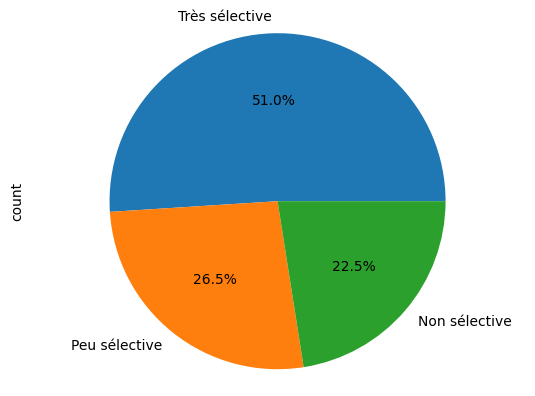

In [8]:
df['selectivity_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()



We can see here from the pie plot that we are facing an unbalanced dataset where the percentage of "formation non selective" is 22.4%, for the formation "peu selective" is equal to 22.5%, and for the formation Trés selective is equal to "Tres sélective".


<Axes: >

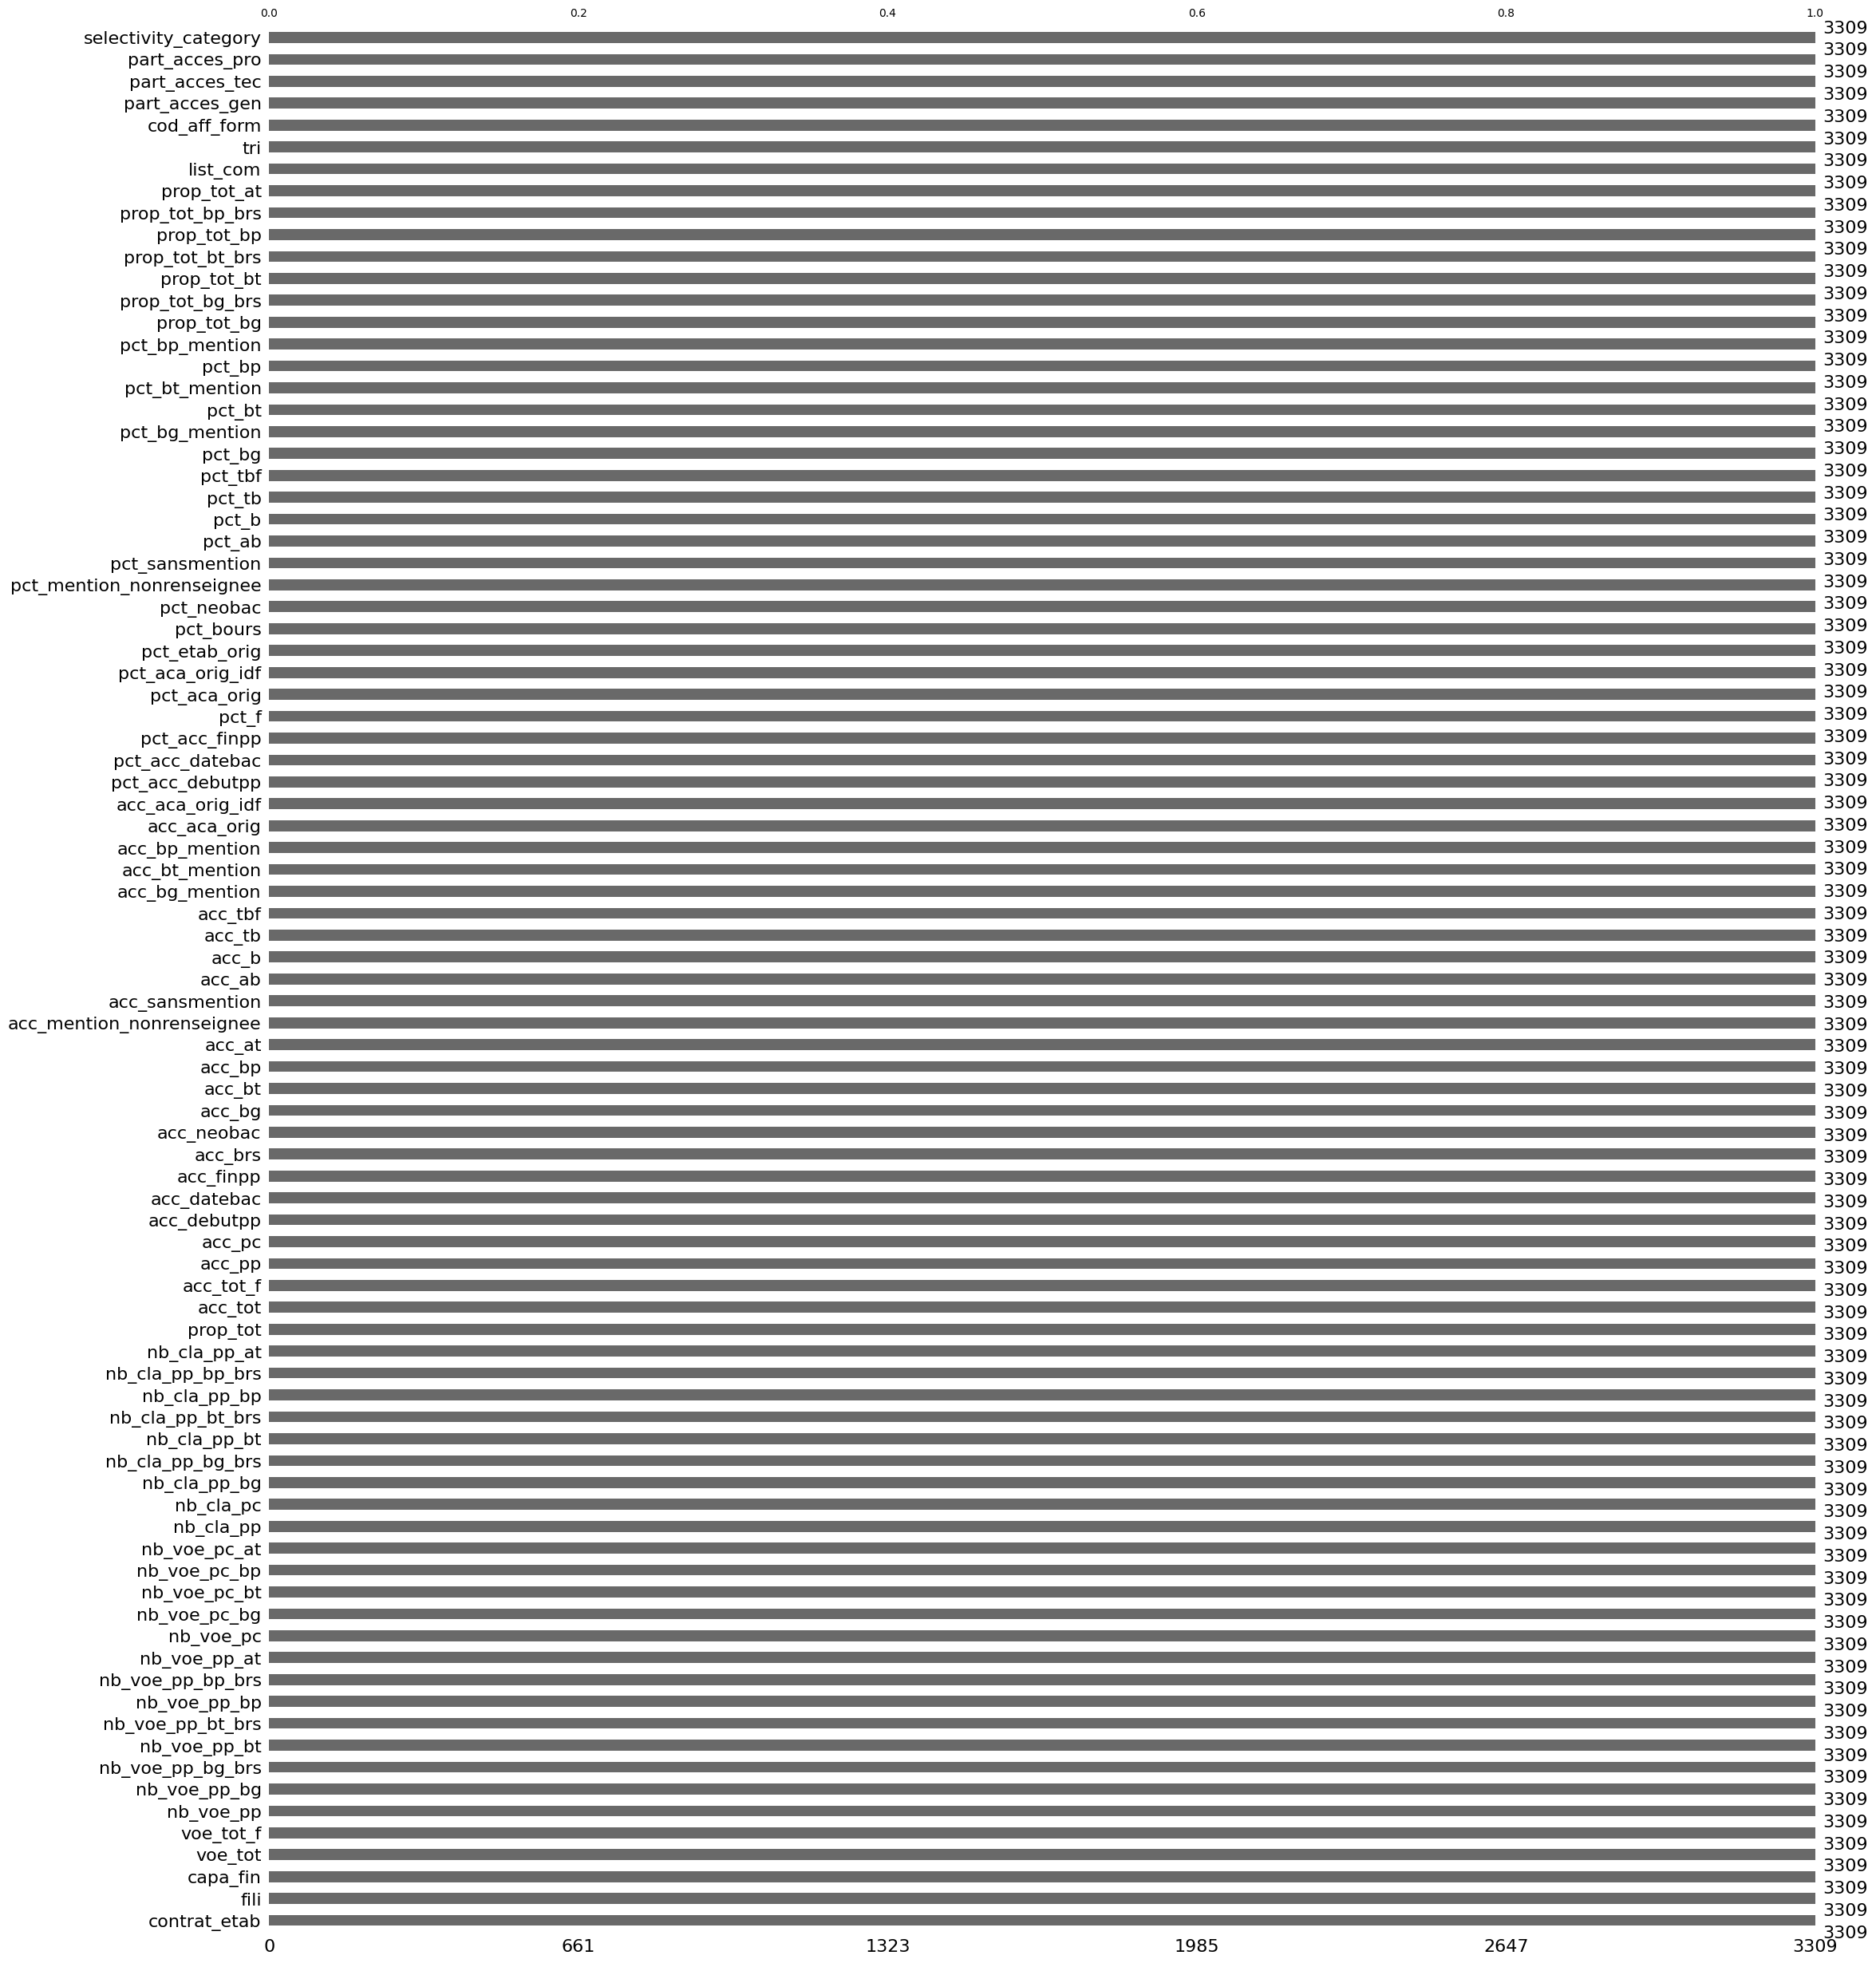

In [9]:
import missingno as msno
msno.bar(df)

By eliminating the variables that we have preprocessed , we have resolved the problem of many missing values, in many columns also , we have been able to eliminate that there is many categorical features that have many unique values .


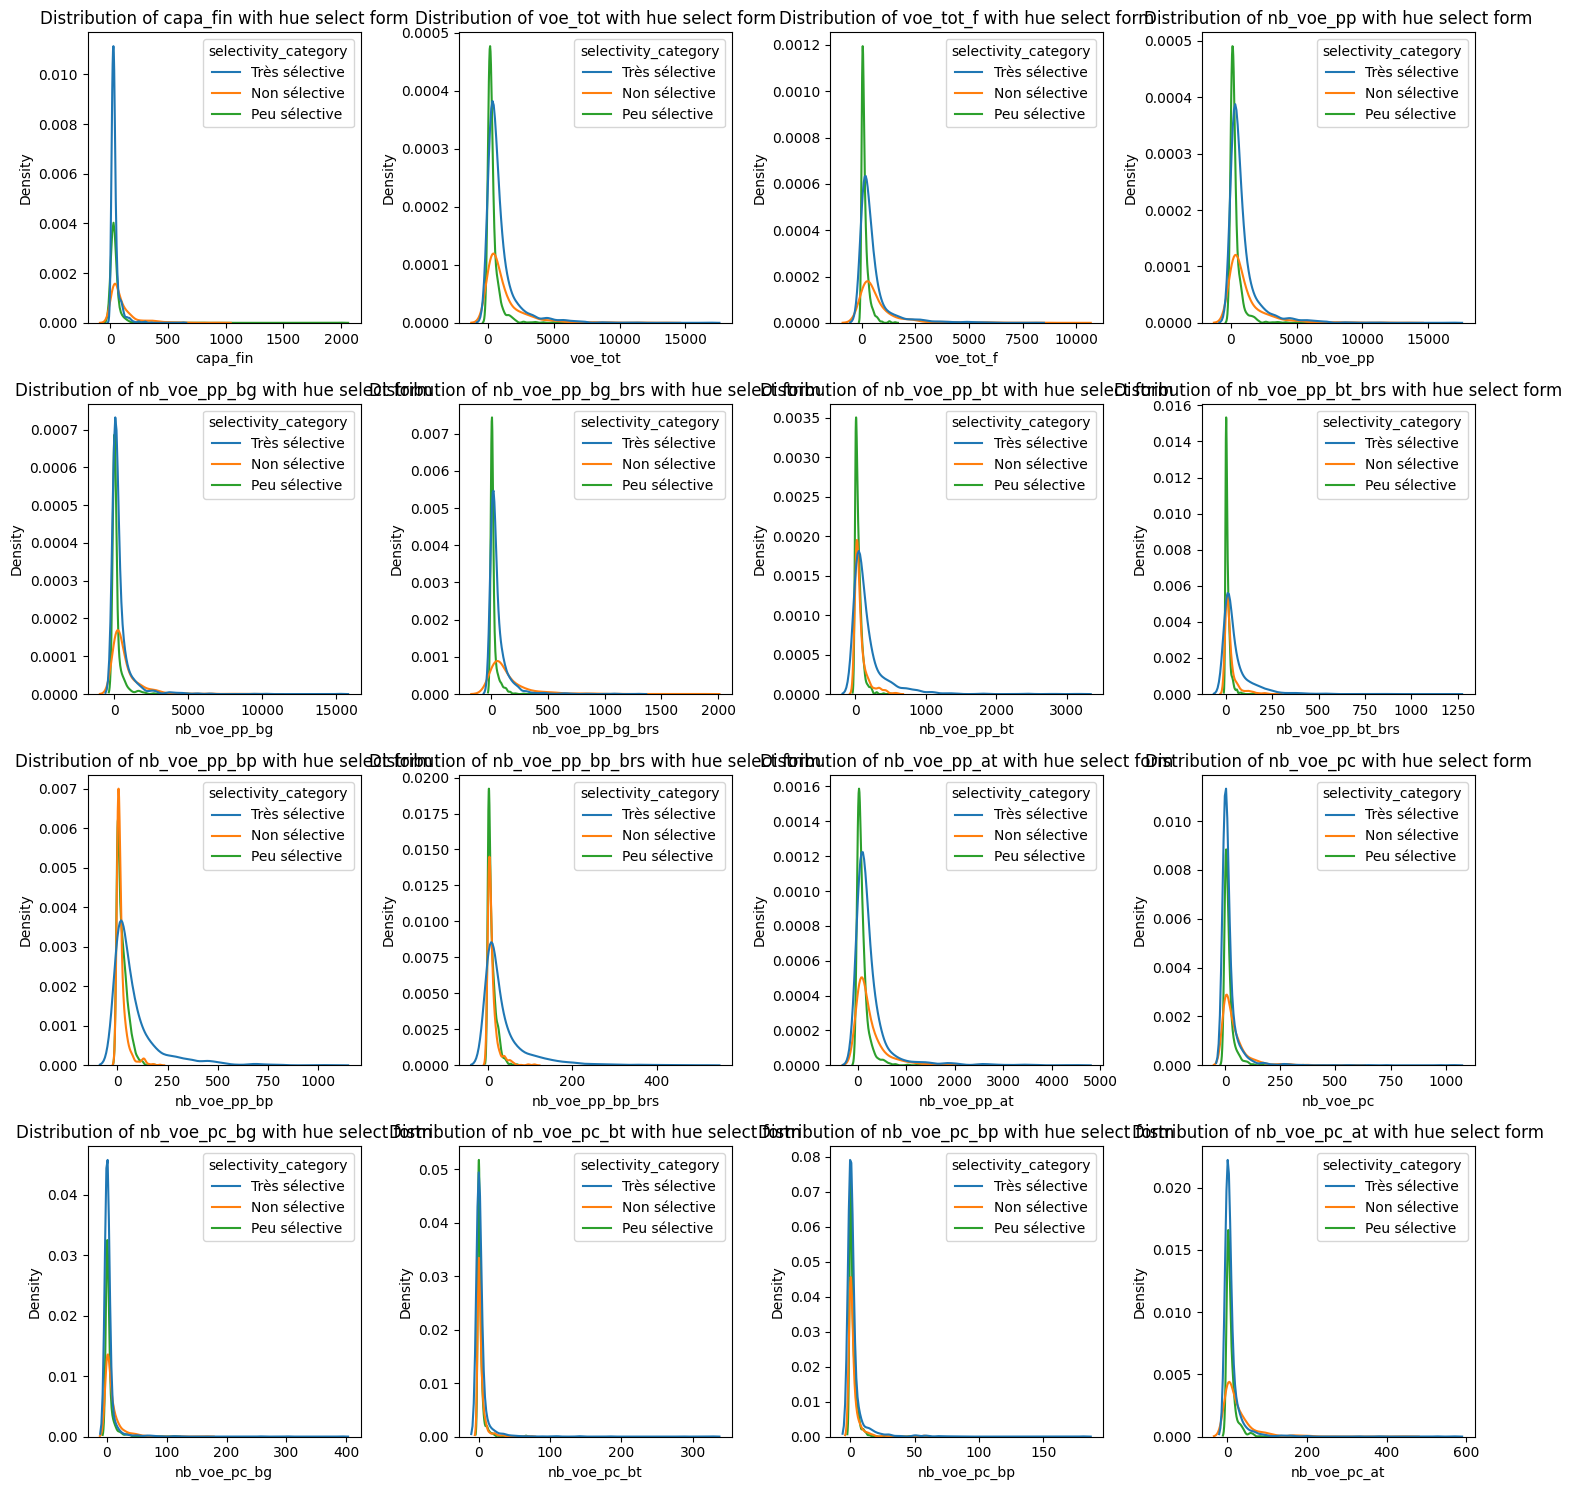

In [10]:

# Select the numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Plot the distribution for each numerical variable
import matplotlib.pyplot as plt
# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Plot the distribution for each numerical variable
for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.kdeplot(data=df, x=col, hue='selectivity_category', ax=axes[i])
        axes[i].set_title(f'Distribution of {col} with hue selectivity_category')

# Remove empty subplots
if len(numerical_cols) < num_rows * num_cols:
    for j in range(len(numerical_cols), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()


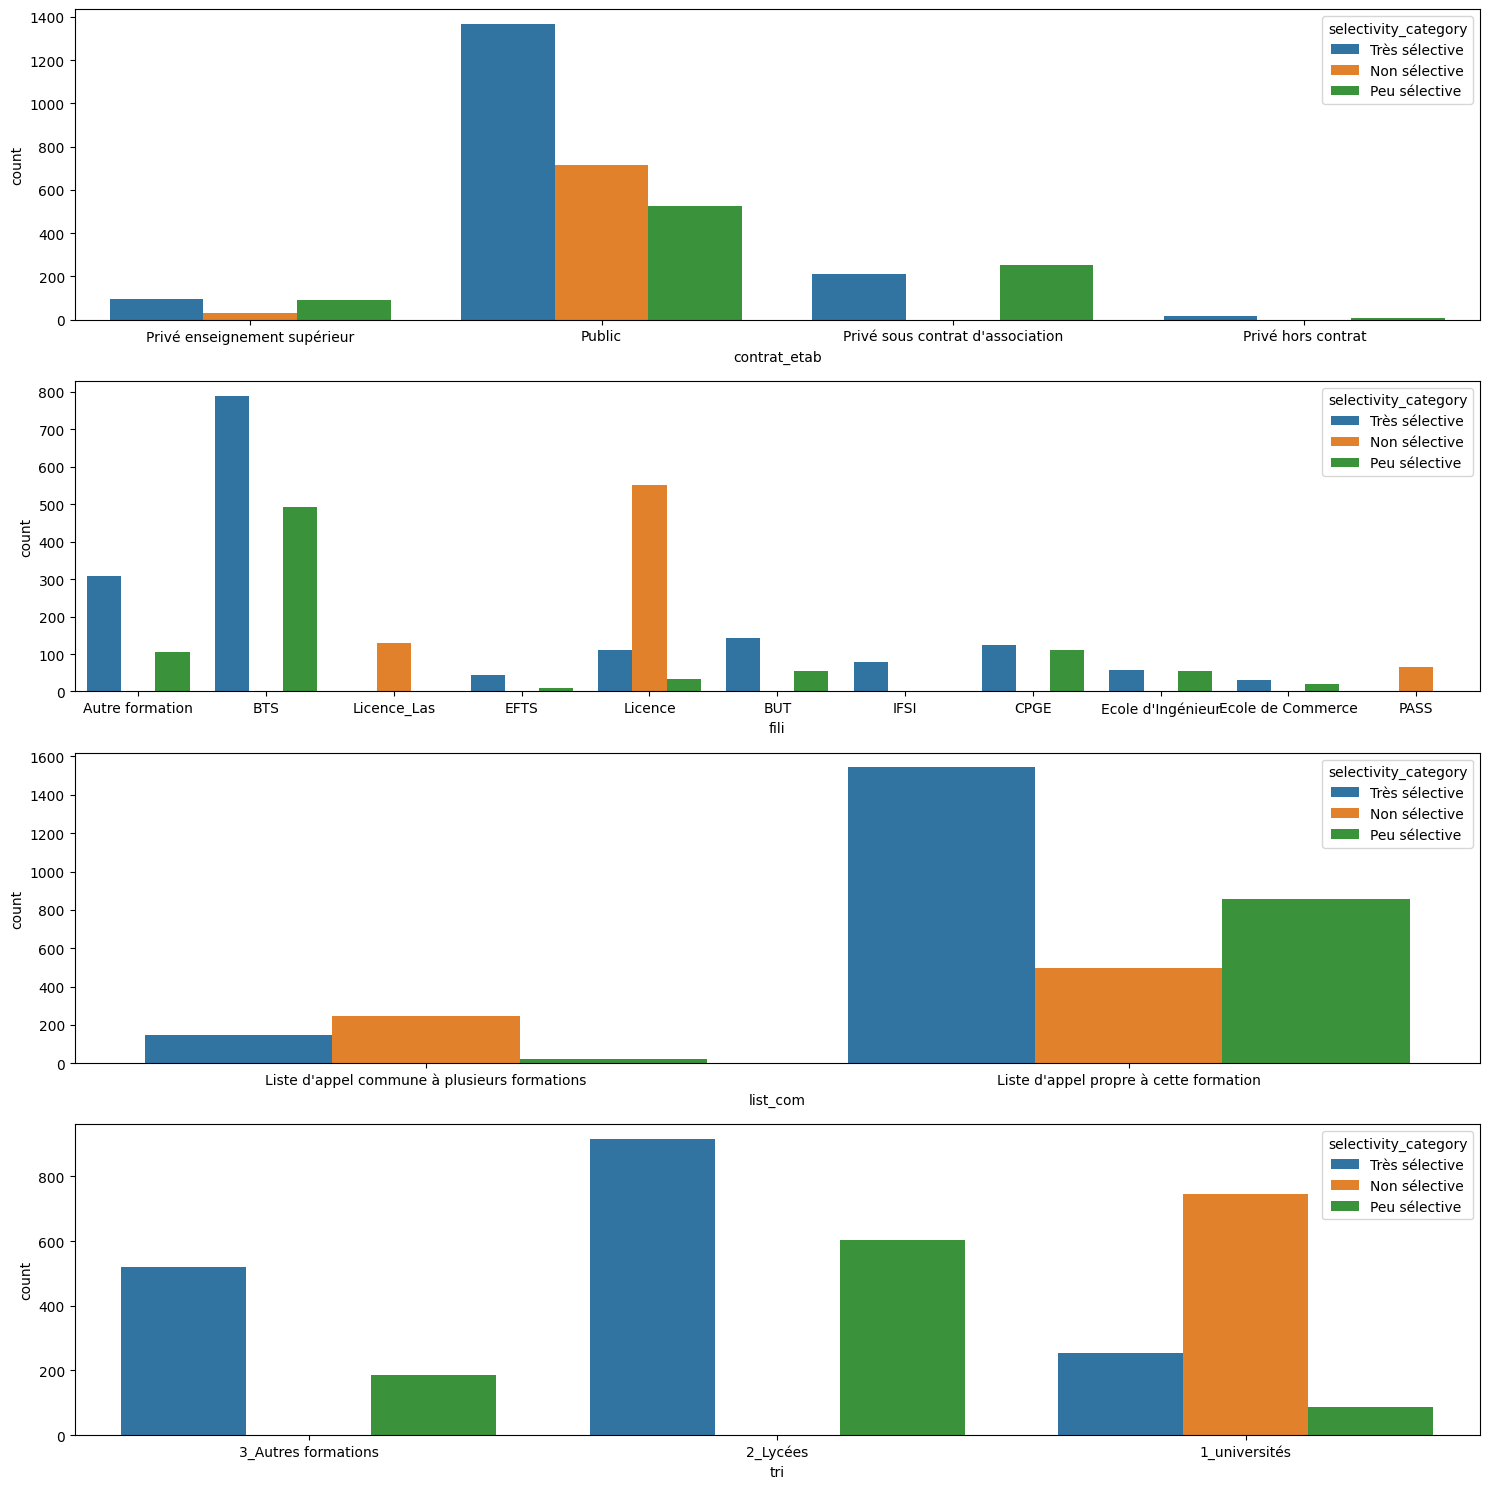

In [11]:
# Define the categorical variables to plot
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

categorical_cols.remove('selectivity_category')
# Calculate the number of rows and columns for subplots
num_rows = len(categorical_cols)
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over the categorical variables
for i, col in enumerate(categorical_cols):
    # Plot the countplot for each categorical variable with hue as selectivity_category
    sns.countplot(x=col, data=df, hue='selectivity_category', ax=axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



We can see here that the categorical variables that we have chosen have a coorealtion with our target , in fact we can see that the formation that are non selective are essentially in the universities , also , we have been able by adding the selectivity category to add to some formation 

In [12]:
df['selectivity_category'] = df['selectivity_category'].map({'Très sélective': 2, 'Peu sélective': 1,"Non sélective":0})

In [13]:
#number of numerical columns
num_cols = df._get_numeric_data().columns

In [5]:
correlation = df[num_cols].corr()
correlation.columns
#plot the coorelation with select_form
correlation_select_form = correlation['selectivity_category'].sort_values(ascending=False)
pd.set_option('display.max_rows', None)
sns.set(font_scale=0.8)  # Adjust the font size of the annotations

plt.figure(figsize=(12, 10))  # Adjust the size of the heatmap

sns.heatmap(correlation_select_form.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with selectivity_category')
plt.show()


NameError: name 'df' is not defined

By looking at the correlation heatmap, we can see that the variables with the highest correlation with selectivity_category many numerical variables are highly correlated with our target varaible , so we should keep them in our modelisation.

In [15]:
print(correlation_select_form[abs(correlation_select_form) < 0.1].index.tolist())



['prop_tot_bt_brs', 'pct_tbf', 'pct_b', 'pct_acc_debutpp', 'nb_voe_pp_at', 'nb_voe_pc_bp', 'pct_acc_datebac', 'acc_tbf', 'pct_bours', 'pct_acc_finpp', 'nb_voe_pc_bt', 'pct_mention_nonrenseignee', 'pct_ab', 'acc_tb', 'nb_voe_pp', 'pct_aca_orig', 'voe_tot', 'pct_aca_orig_idf', 'voe_tot_f', 'acc_mention_nonrenseignee', 'pct_f']


In [16]:
df = df.drop(columns=['prop_tot_bt_brs', 'pct_tbf', 'pct_b', 'pct_acc_debutpp', 'nb_voe_pp_at', 'nb_voe_pc_bp', 'pct_acc_datebac', 'acc_tbf', 'pct_bours', 'pct_acc_finpp', 'nb_voe_pc_bt', 'pct_mention_nonrenseignee', 'pct_ab', 'acc_tb', 'nb_voe_pp', 'pct_aca_orig', 'voe_tot', 'pct_aca_orig_idf', 'voe_tot_f', 'acc_mention_nonrenseignee', 'pct_f'],axis=1)

In [17]:
X=df.drop(columns=['selectivity_category'],axis=1)
y=df['selectivity_category']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

Scalling data 

In [18]:
# Selecting categorical and numerical fetaures
cat_cols = df.drop('selectivity_category', axis=1).select_dtypes(['object']).columns.tolist()
num_cols = df.drop('selectivity_category', axis=1).select_dtypes('number').columns.tolist()

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

## Base Model <a class="anchor" id="Base Model"></a>

This section will showcase a base model, and the objective of this challenge is to surpass the score achieved by this dummy model.

In [19]:
clf = Pipeline(
    steps=[("transformer", preprocessor), ("classifier",RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0))]
)

In [20]:
clf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['capa_fin', 'nb_voe_pp_bg',
                                                   'nb_voe_pp_bg_brs',
                                                   'nb_voe_pp_bt',
                                                   'nb_voe_pp_bt_brs',
                                                   'nb_voe_pp_bp',
                                                   'nb_voe_pp_bp_brs',
                                                   'nb_voe_pc', 'nb_voe_pc_bg',
                                                   'nb_voe_pc_at', 'nb_cla_pp',
                                                   'nb_cla_pc', 'nb_cla_pp_bg',
                                                   'nb_cla_pp_bg_brs',
                                                   'nb_cla_pp_bt',
                                                   'nb_cla_pp_bt_brs',
                                                   'nb_cla_pp_bp',
                                                   'nb_cla_pp_bp_brs',
                                                   'nb_cla_pp_at', 'prop_tot',
                                                   'acc_tot', 'acc_tot_f',
                                                   'acc_pp', 'acc_pc',
                                                   'acc_debutpp', 'acc_datebac',
                                                   'acc_finpp', 'acc_brs',
                                                   'acc_neobac', 'acc_bg', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['contrat_etab', 'fili',
                                                   'list_com', 'tri'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=2, random_state=0))])

In [21]:
y_pred = clf.predict(X_test)


In [22]:
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)

In [23]:

# Predicting on test data
y_pred = clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
print('The test accuracy is : ', accuracy)
print('The test balanced accuracy is : ', balanced_accuracy)
print(report)

The test accuracy is :  0.7643504531722054
The test balanced accuracy is :  0.709451442132165
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       144
           1       0.74      0.26      0.38       166
           2       0.72      0.93      0.81       352

    accuracy                           0.76       662
   macro avg       0.79      0.71      0.70       662
weighted avg       0.77      0.76      0.73       662



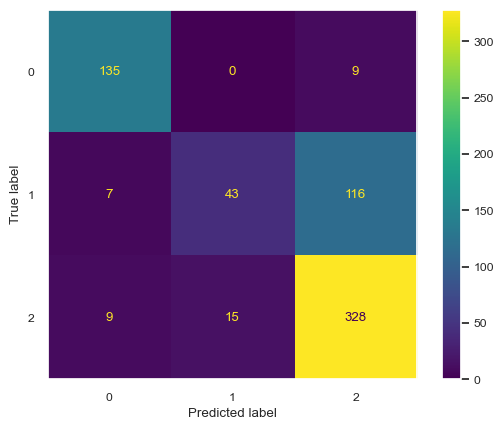

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=clf[1].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf[1].classes_)
disp.plot()
plt.grid(False)
plt.show()


As previously mentioned, the dataset exhibits significant imbalance in the target class, which notably impacts the model's balanced accuracy. This imbalance is evident from the remarquable discrepancy observed between the accuracy score (0.79) and the balanced accuracy score (0.70), highlighting the need for strategies to address this imbalance for more reliable model performance (such as using balancing techniques like SMNOTE, or specifying the class_weight='balanced' in the model,...).



## Submitting to the online challenge: [ramp.studio](https://ramp.studio) <a class="anchor" id="submitting"></a>

Once you found a good model, you can submit them to [ramp.studio](https://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event . Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](https://www.ramp.studio/events/tephra_datacamp2023/sandbox) and write the code for your classifier directly on the browser. You can also create a new folder `my_submission` in the `submissions` folder containing `classifier.py` and upload this file directly. You can check the starting-kit ([`classifier.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). Once it is trained, your submission shows up on the [public leaderboard](https://www.ramp.studio/events/tephra_datacamp2023/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the [leaderboard](http://www.ramp.studio/events/tephra_datacamp2023/leaderboard)) is the balenced accuracy score (`bal_acc`). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [30]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cat_cols = ['contrat_etab', 'fili', 'list_com', 'tri']
num_cols =['capa_fin', 'nb_voe_pp_bg', 'nb_voe_pp_bg_brs', 'nb_voe_pp_bt', 'nb_voe_pp_bt_brs', 'nb_voe_pp_bp', 'nb_voe_pp_bp_brs', 'nb_voe_pc', 'nb_voe_pc_bg', 'nb_voe_pc_at', 'nb_cla_pp', 'nb_cla_pc', 'nb_cla_pp_bg', 'nb_cla_pp_bg_brs', 'nb_cla_pp_bt', 'nb_cla_pp_bt_brs', 'nb_cla_pp_bp', 'nb_cla_pp_bp_brs', 'nb_cla_pp_at', 'prop_tot', 'acc_tot', 'acc_tot_f', 'acc_pp', 'acc_pc', 'acc_debutpp', 'acc_datebac', 'acc_finpp', 'acc_brs', 'acc_neobac', 'acc_bg', 'acc_bt', 'acc_bp', 'acc_at', 'acc_sansmention', 'acc_ab', 'acc_b', 'acc_bg_mention', 'acc_bt_mention', 'acc_bp_mention', 'acc_aca_orig', 'acc_aca_orig_idf', 'pct_etab_orig', 'pct_neobac', 'pct_sansmention', 'pct_tb', 'pct_bg', 'pct_bg_mention', 'pct_bt', 'pct_bt_mention', 'pct_bp', 'pct_bp_mention', 'prop_tot_bg', 'prop_tot_bg_brs', 'prop_tot_bt', 'prop_tot_bp', 'prop_tot_bp_brs', 'prop_tot_at', 'cod_aff_form', 'part_acces_gen', 'part_acces_tec', 'part_acces_pro']
class Classifier(BaseEstimator):
    def __init__(self):
    
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), num_cols),
                ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                ])
        self.model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
        self.pipe = Pipeline(steps=[('preprocessor', self.preprocessor),
                           ('model', self.model)])

    def fit(self, X, y):
        return self.pipe.fit(X, y)

    def predict(self, X):
        return self.pipe.predict(X)

    def predict_proba(self, X):
        return self.pipe.predict_proba(X)

You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>. Here is an example with the starting_kit submission:



In [4]:
!ramp-test --submission starting_kit

Testing Selectivity of higher education programs in France
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score  bal_acc    acc      time
	train    0.134  0.112  0.336029
	valid    0.117  0.097  0.014115
	test     0.155  0.124  0.006111
CV fold 1
	score  bal_acc    acc      time
	train    0.134  0.112  0.196746
	valid    0.121  0.106  0.014358
	test     0.148  0.121  0.006865
CV fold 2
	score  bal_acc    acc      time
	train    0.131  0.109  0.195965
	valid    0.136  0.115  0.014592
	test     0.154  0.124  0.007052
CV fold 3
	score  bal_acc    acc      time
	train    0.136  0.112  0.200003
	valid    0.140  0.116  0.014333
	test     0.164  0.132  0.006669
CV fold 4
	score  bal_acc    acc      time
	train    0.118  0.098  0.197114
	valid    0.104  0.083  0.014284
	test     0.137  0.111  0.006935
----------------------------
Mean CV scores
----------------------------
	score         bal_acc             acc        time
	train  